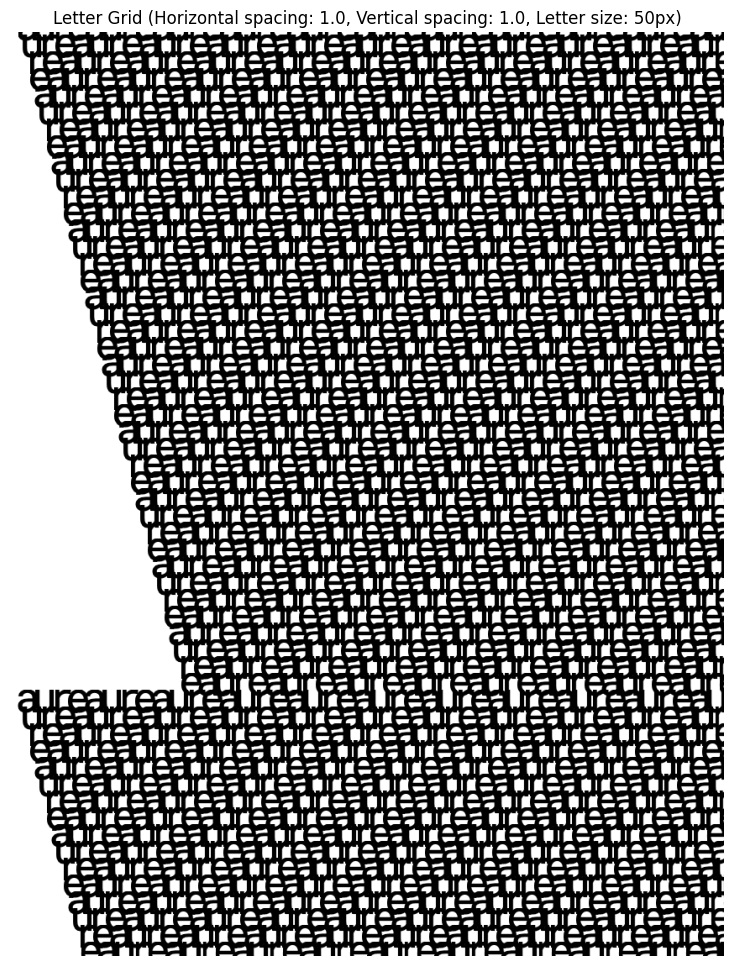

All SVG files created


In [81]:
import random
import svgwrite
import matplotlib.pyplot as plt
from cairosvg import svg2png
from IPython.display import Image
import io

def create_letter_grid(
    width=850,
    height=1100,
    cell_size=26,           # Base grid cell size
    letter_size=None,       # Font size (defaults to cell_size//2 if None)
    x_offset_factor=0.33,   # Horizontal offset within cell (as proportion of cell_size)
    y_offset_factor=0.5,    # Vertical offset within cell (as proportion of cell_size)
    horizontal_spacing=1.0, # Multiplier for horizontal letter spacing
    vertical_spacing=1.0,   # Multiplier for vertical letter spacing
    output_filename="letter_grid.svg",
    add_rectangles=False,
    preview=True,
    additional_x_offset=0.0,
    additional_y_offset=0.0,

):
    # Set default letter size if not specified
    if letter_size is None:
        letter_size = cell_size // 2
    
    # Calculate actual spacings
    h_spacing = cell_size * horizontal_spacing
    v_spacing = cell_size * vertical_spacing
    
    # Create SVG drawing
    dwg = svgwrite.Drawing(output_filename, size=(f"{width}px", f"{height}px"))
    
    # Define the sequence
    sequence = ['a', 'u', 'r', 'e']
    
    # Calculate grid dimensions based on spacings
    cols = int(width / h_spacing) + 1  # +1 to ensure we fill the canvas
    rows = int(height / v_spacing) + 1  # +1 to ensure we fill the canvas
    
    # Create a matrix to track where letters have been placed
    grid = [[' ' for _ in range(cols)] for _ in range(rows)]
    
    # Create the grid with multiple word rows
    num_word_rows = rows // len(sequence)  # Number of complete word sequences that can fit
    
    # Rectangle dimensions
    rect_width = h_spacing * 5  # Width to cover 4 letters
    rect_height = cell_size * 1.0  # Height of rectangle
    
    # Create a group for all letters
    letters_group = dwg.add(dwg.g(font_family="'Roboto Mono', monospace", font_size=f"{letter_size}px",
                                  fill="none", stroke="black", stroke_width="0.1"))
    
    # Add letters to the grid
    for col in range(0, cols):
        for word_row in range(num_word_rows):
            # Calculate vertical offset for this word row
            y_offset = word_row * len(sequence) * v_spacing
            
            # Apply staggering to the entire 4-letter sequence as a unit
            # This keeps "aurea" together as a unit
            word_stagger_offset = (word_row % 10) * (h_spacing * 1.0)
            # word_stagger_offset = 0
            
            # Create sequence for this column
            curr_sequence = []
            for i in range(len(sequence)):
                curr_sequence.append(sequence[(col + i) % len(sequence)])
                
            # Draw the vertical sequence
            for i in range(len(sequence)):
                letter = curr_sequence[i]

                # Calculate row index for staggering
                row_idx = word_row * len(sequence) + i
                row_stagger_offset = (row_idx % 4) * (h_spacing * 0.25)  # Offset every other row by half cell
                # row_stagger_offset = 0
                
                x = col * h_spacing + h_spacing * x_offset_factor + word_stagger_offset + row_stagger_offset
                y = y_offset + i * v_spacing + v_spacing * y_offset_factor
                
                letters_group.add(dwg.text(letter, insert=(x, y), fill='black'))
                
                # Try to update grid if within bounds
                row_idx = word_row * len(sequence) + i
                if 0 <= row_idx < len(grid) and 0 <= col < len(grid[0]):
                    grid[row_idx][col] = letter
    

    if preview:
        # Convert SVG to PNG bytes
        svg_string = dwg.tostring()
        png_bytes = io.BytesIO()
        svg2png(bytestring=svg_string, write_to=png_bytes)
        png_bytes.seek(0)
        
        # Display the image
        plt.figure(figsize=(12, 12))
        plt.imshow(plt.imread(png_bytes, format='png'))
        plt.axis('off')
        plt.title(f"Letter Grid (Horizontal spacing: {horizontal_spacing}, Vertical spacing: {vertical_spacing}, Letter size: {letter_size}px)")
        plt.show()

    else:
        # Save the SVG file
        dwg.save()
        print(f"Created letter grid in '{output_filename}'")
    
    return output_filename

if __name__ == "__main__":
    # Examples of different overlapping effects:
    out_dir = "/Users/xbno/Downloads"
    # 1. Normal spacing (no overlap)
    # output_file = create_letter_grid(
    #     cell_size=26,
    #     letter_size=13,
    #     horizontal_spacing=1.0,
    #     vertical_spacing=1.0,
    #     output_filename=f"{out_dir}/normal_grid.svg"
    # )
    
    # # 2. Dense horizontal overlap
    # output_file = create_letter_grid(
    #     cell_size=26,
    #     letter_size=20,
    #     horizontal_spacing=0.7,  # Compress horizontally
    #     vertical_spacing=1.0,
    #     output_filename=f"{out_dir}/horizontal_overlap_grid.svg"
    # )
    
    # 3. Dense overall overlap
    # output_file = create_letter_grid(
    #     cell_size=20,
    #     letter_size=30,  # Larger letters
    #     horizontal_spacing=0.7,  # Compress horizontally
    #     vertical_spacing=0.85,    # Compress vertically
    #     output_filename=f"{out_dir}/dense_overlap_grid.svg",
    #     # preview=False
    # )

    # extra dense chunky
    output_file = create_letter_grid(
        cell_size=20,
        letter_size=50,  # Larger letters
        horizontal_spacing=1.0, #0.7,  # Compress horizontally
        vertical_spacing=1.0, #0.85,    # Compress vertically
        output_filename=f"{out_dir}/chunky_overlap_grid.svg",
        # preview=False
    )
    
    print("All SVG files created")